In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('covid_data.csv')

In [5]:
df.head(n=-5)

,Date_YMD,Daily Confirmed
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1
...,...,...
494,2021-06-07,85804
495,2021-06-08,92787
496,2021-06-09,93883
497,2021-06-10,91849


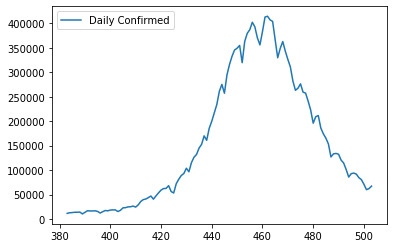

In [9]:
df[383:].plot()

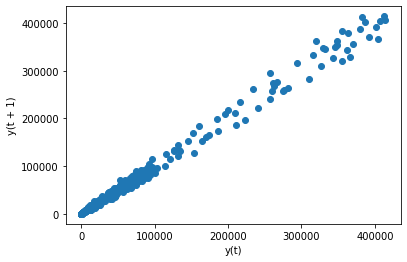

In [83]:
from pandas.plotting import lag_plot
lag_plot(df['Daily Confirmed'])
plt.show()

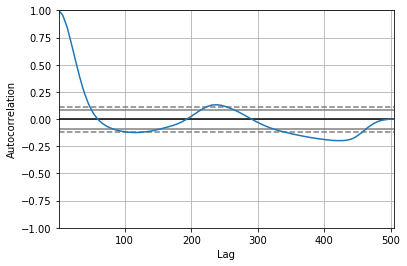

In [82]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Daily Confirmed'])

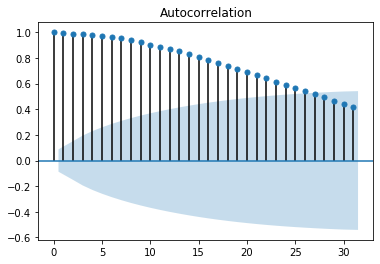

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Daily Confirmed'], lags=31)
pyplot.show()

In [176]:
df_s = pd.read_csv('state_wise_daily.csv')

In [193]:
df_s_cnf = df_s[((df_s['Status']=='Confirmed'))]

In [199]:
df_br = df_s_cnf[['Date_YMD','BR']]

In [209]:
df_br

,Date_YMD,BR
0,2020-03-14,0
3,2020-03-15,0
6,2020-03-16,0
9,2020-03-17,0
12,2020-03-18,0
...,...,...
1368,2021-06-13,487
1371,2021-06-14,324
1374,2021-06-15,410
1377,2021-06-16,370


In [210]:
##BIHAr

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


predicted=128.591518, expected=170.000000
predicted=178.666061, expected=258.000000
predicted=237.825726, expected=211.000000
predicted=229.095573, expected=195.000000
predicted=230.295491, expected=351.000000
predicted=339.179761, expected=239.000000
predicted=279.653399, expected=74.000000
predicted=161.456143, expected=259.000000
predicted=274.142570, expected=488.000000
predicted=408.395999, expected=662.000000
predicted=639.684182, expected=836.000000
predicted=872.828938, expected=864.000000
predicted=851.336207, expected=935.000000
predicted=996.376767, expected=1080.000000
predicted=1263.968231, expected=1527.000000
predicted=1649.117870, expected=1911.000000
predicted=1998.890584, expected=2174.000000
predicted=2297.853200, expected=3469.000000
predicted=3479.749215, expected=3756.000000
predicted=3930.682243, expected=2999.000000
predicted=3541.963531, expected=4157.000000
predicted=4649.475154, expected=4786.000000
predicted=4997.832676, expected=6133.000000
predicted=6453.5

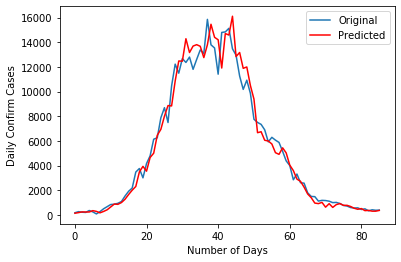

In [10]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

series_train = read_csv('br_covid_train.csv', header=0, index_col=0)
series_test = read_csv('br_covid_test.csv', header=0, index_col=0)


X = series_train.values
y = series_test.values

train, test = X, y
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(6,2,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test,label='Original')
pyplot.plot(predictions, color='red',label='Predicted')
pyplot.xlabel('Number of Days')
pyplot.ylabel('Daily Confirm Cases')
pyplot.legend()
pyplot.show()

In [236]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def evaluate_arima_model(train,test, arima_order):

    train, test = train,test
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train,test, p_values, d_values, q_values):
    train = train.astype('float32')
    test = test.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train,test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
#load dataset

series_train = read_csv('br_covid_train.csv', header=0, index_col=0)
series_test = read_csv('br_covid_test.csv', header=0, index_col=0)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series_train.values,series_test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=6510.400
ARIMA(0, 0, 1) RMSE=3690.917
ARIMA(0, 1, 0) RMSE=933.245
ARIMA(0, 1, 1) RMSE=954.990
ARIMA(0, 1, 2) RMSE=976.155
ARIMA(0, 2, 0) RMSE=1378.063
ARIMA(0, 2, 1) RMSE=941.037
ARIMA(1, 0, 0) RMSE=933.237
ARIMA(1, 1, 0) RMSE=952.178
ARIMA(1, 1, 1) RMSE=975.946
ARIMA(1, 1, 2) RMSE=948.209
ARIMA(1, 2, 0) RMSE=1095.109
ARIMA(2, 0, 0) RMSE=977.191
ARIMA(2, 1, 0) RMSE=965.432
ARIMA(2, 1, 1) RMSE=967.008
ARIMA(2, 1, 2) RMSE=981.947
ARIMA(2, 2, 0) RMSE=1065.172
ARIMA(2, 2, 1) RMSE=956.555
ARIMA(4, 0, 0) RMSE=987.187
ARIMA(4, 1, 0) RMSE=986.451
ARIMA(4, 1, 1) RMSE=951.750
ARIMA(4, 1, 2) RMSE=961.564
ARIMA(4, 2, 0) RMSE=1004.641
ARIMA(4, 2, 1) RMSE=968.506
ARIMA(4, 2, 2) RMSE=1009.510
ARIMA(6, 0, 0) RMSE=1000.629
ARIMA(6, 1, 0) RMSE=1007.493
ARIMA(6, 1, 1) RMSE=964.720
ARIMA(6, 2, 0) RMSE=906.430
ARIMA(6, 2, 1) RMSE=918.566
ARIMA(6, 2, 2) RMSE=934.038
ARIMA(8, 1, 0) RMSE=920.315
ARIMA(8, 2, 0) RMSE=931.460
ARIMA(8, 2, 1) RMSE=980.905
ARIMA(10, 1, 0) RMSE=951.732
ARIMA(10, 